In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
df=pd.read_excel("Absenteeism_at_work_Project.xls")

In [64]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [65]:
df.shape

(740, 21)

In [66]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [67]:
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [68]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [69]:
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [70]:
df['ID']=df['ID'].astype('category')
df['Reason for absence']=df['Reason for absence'].astype('category')
df['Month of absence']=df['Month of absence'].astype('category')
df['Day of the week']=df['Day of the week'].astype('category')
df['Seasons']=df['Seasons'].astype('category')
df['Disciplinary failure']=df['Disciplinary failure'].astype('category')
df['Education']=df['Education'].astype('category')
df['Son']=df['Son'].astype('category')
df['Social drinker']=df['Social drinker'].astype('category')
df['Social smoker']=df['Social smoker'].astype('category')
df['Pet']=df['Pet'].astype('category')

In [71]:
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [72]:
df.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [73]:
df['Reason for absence'].value_counts()

23.0    149
28.0    110
27.0     69
13.0     55
0.0      43
19.0     40
22.0     37
26.0     33
25.0     31
11.0     26
10.0     25
18.0     21
14.0     19
1.0      16
7.0      15
6.0       8
12.0      8
8.0       6
21.0      6
9.0       4
5.0       3
24.0      3
16.0      3
4.0       2
15.0      2
3.0       1
2.0       1
17.0      1
Name: Reason for absence, dtype: int64

In [74]:
data=df.dropna()

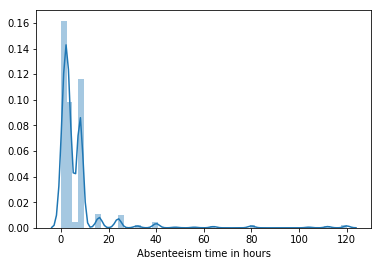

In [75]:
sns.distplot(data['Absenteeism time in hours'])

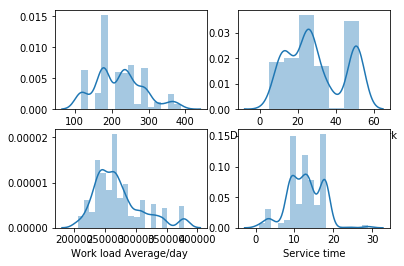

In [76]:
plt.subplot(221)
sns.distplot(data['Transportation expense'])
plt.subplot(222)
sns.distplot(data['Distance from Residence to Work'])
plt.subplot(223)
sns.distplot(data['Work load Average/day '])
plt.subplot(224)
sns.distplot(data['Service time'])

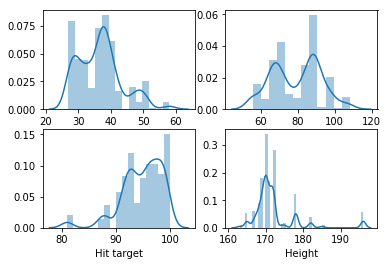

In [77]:
plt.subplot(221)
sns.distplot(data['Age'])
plt.subplot(222)
sns.distplot(data['Weight'])
plt.subplot(223)
sns.distplot(data['Hit target'])
plt.subplot(224)
sns.distplot(data['Height'])

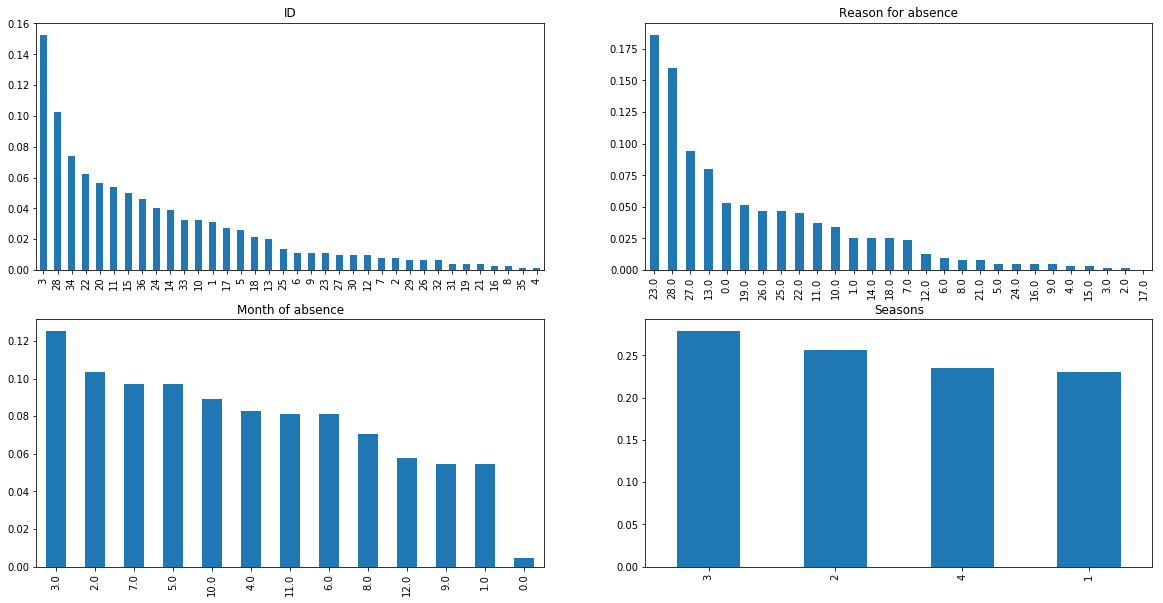

In [78]:
plt.subplot(221)
df['ID'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'ID')
plt.subplot(222)
data['Reason for absence'].value_counts(normalize=True).plot.bar(title= 'Reason for absence')
plt.subplot(223)
data['Month of absence'].value_counts(normalize=True).plot.bar(title= 'Month of absence')
plt.subplot(224)
data['Seasons'].value_counts(normalize=True).plot.bar(title= 'Seasons')


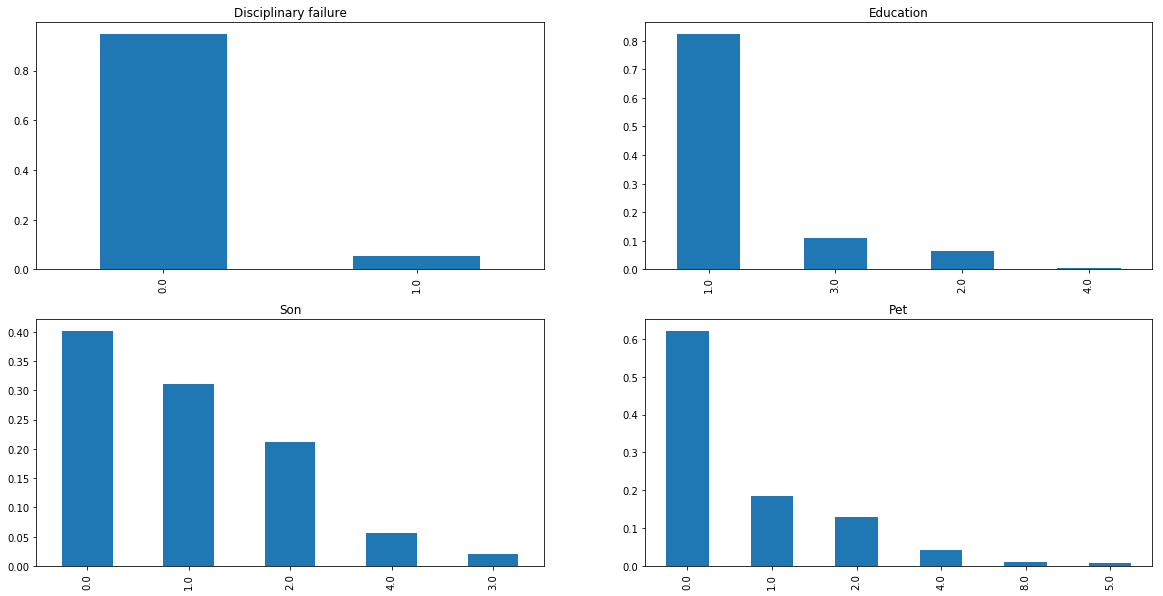

In [79]:
plt.subplot(221)
df['Disciplinary failure'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Disciplinary failure')
plt.subplot(222)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(223)
df['Son'].value_counts(normalize=True).plot.bar(title= 'Son')
plt.subplot(224)
df['Pet'].value_counts(normalize=True).plot.bar(title= 'Pet')


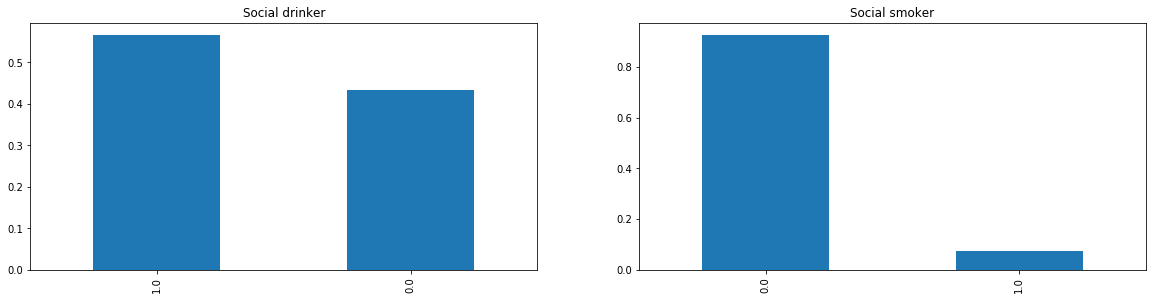

In [80]:
plt.subplot(221)
df['Social drinker'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Social drinker')
plt.subplot(222)
df['Social smoker'].value_counts(normalize=True).plot.bar(title= 'Social smoker')
#there are many employees who doesnt smoke

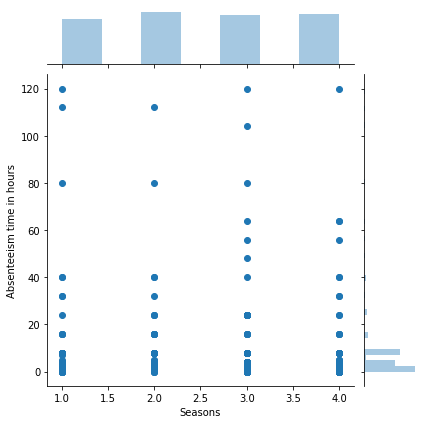

In [81]:
sns.jointplot(x='Seasons',y='Absenteeism time in hours',data=df)

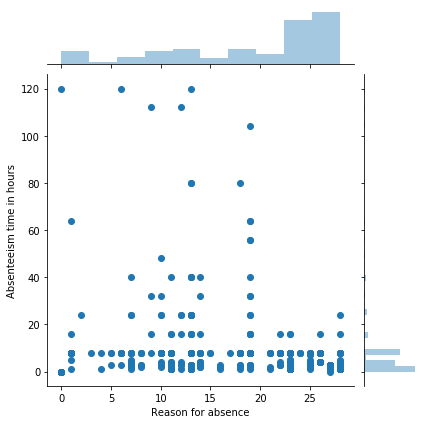

In [82]:
sns.jointplot(x='Reason for absence',y='Absenteeism time in hours',data=df)

In [83]:
reason = df.groupby('Reason for absence')
reason['Absenteeism time in hours'].max()

Reason for absence
0.0     120.0
1.0      64.0
2.0      24.0
3.0       8.0
4.0       8.0
5.0       8.0
6.0     120.0
7.0      40.0
8.0       8.0
9.0     112.0
10.0     48.0
11.0     40.0
12.0    112.0
13.0    120.0
14.0     40.0
15.0      8.0
16.0      3.0
17.0      8.0
18.0     80.0
19.0    104.0
21.0      8.0
22.0     16.0
23.0     16.0
24.0      8.0
25.0      8.0
26.0     16.0
27.0      3.0
28.0     24.0
Name: Absenteeism time in hours, dtype: float64

In [84]:
# (6),(9)(12)(13)(19) are some of the major reasons of absenteeism

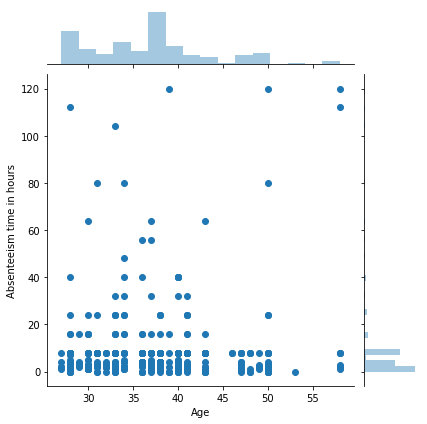

In [85]:
sns.jointplot(x='Age',y='Absenteeism time in hours',data=df)

In [86]:
#this shows that age is correlated

<Figure size 864x432 with 0 Axes>

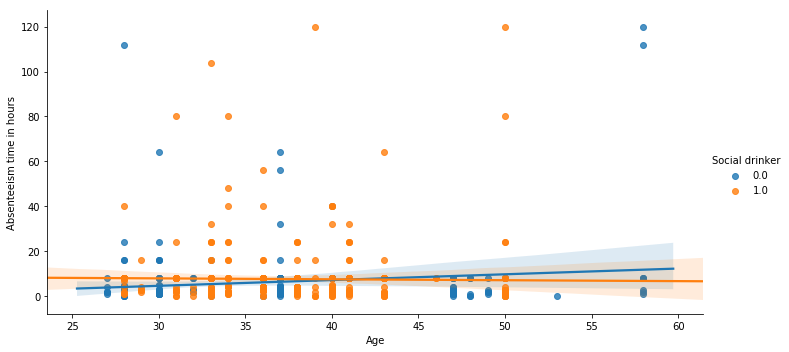

In [87]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Social drinker',height=5,aspect=2)

In [88]:
# we see that from age 33-45 has more abseenteeism and also they are social drinker so the reason may be they cannot come most of the day because of the hangover

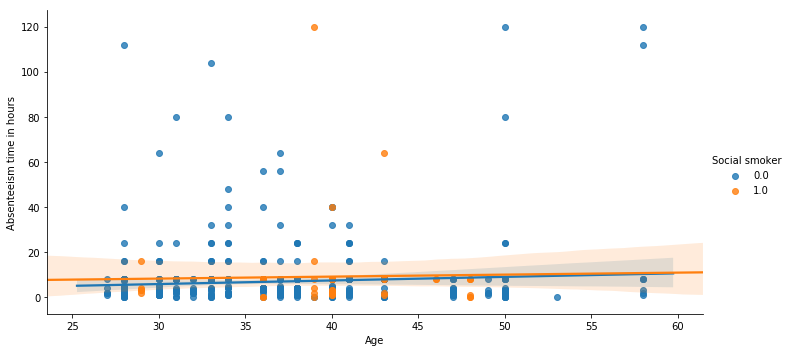

In [89]:
#plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Social smoker',height=5,aspect=2)

In [90]:
#most of the non smoker stays absent for more hours ans smokers stays present

<Figure size 864x432 with 0 Axes>

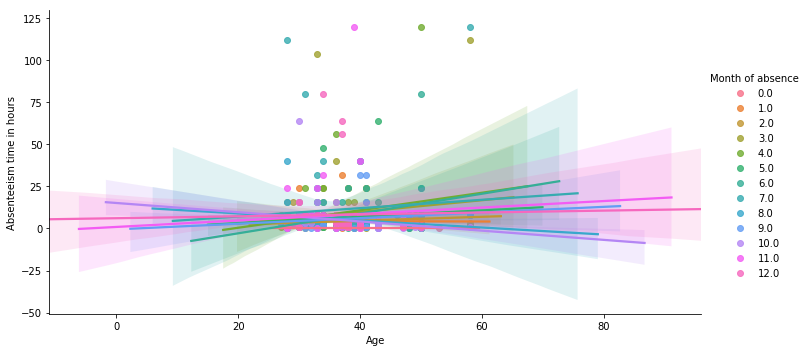

In [91]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Month of absence',height=5,aspect=2)

In [92]:
#most of the employee remains absent in winter

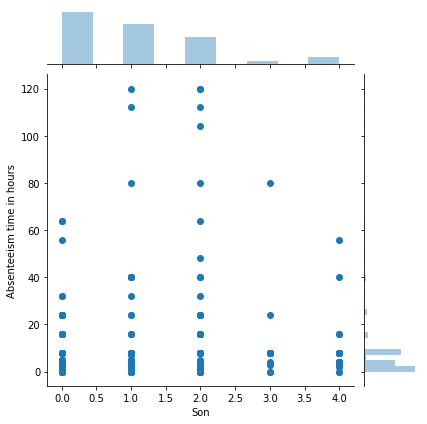

In [93]:
sns.jointplot(x='Son',y='Absenteeism time in hours',data=df)

In [94]:
# employees having 1 or 2 childern stays absent for long as they might haveto look after them

In [95]:
df.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [96]:
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [97]:
df['Reason for absence'].fillna(df['Reason for absence'].mode()[0],inplace=True)
df['Month of absence'].fillna(df['Month of absence'].mode()[0],inplace=True)
df['Disciplinary failure'].fillna(df['Disciplinary failure'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['Son'].fillna(df['Son'].mode()[0],inplace=True)
df['Social drinker'].fillna(df['Social drinker'].mode()[0],inplace=True)
df['Social smoker'].fillna(df['Social smoker'].mode()[0],inplace=True)
df['Pet'].fillna(df['Pet'].mode()[0],inplace=True)

In [98]:
df['Transportation expense'].fillna(df['Transportation expense'].mean(),inplace=True)
df['Distance from Residence to Work'].fillna(df['Distance from Residence to Work'].mean(),inplace=True)
df['Service time'].fillna(df['Service time'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Work load Average/day '].fillna(df['Work load Average/day '].mean(),inplace=True)
df['Hit target'].fillna(df['Hit target'].mean(),inplace=True)
df['Weight'].fillna(df['Weight'].mean(),inplace=True)
df['Body mass index'].fillna(df['Body mass index'].mean(),inplace=True)
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [99]:
df.dropna(how='any',axis='rows',inplace=True)

In [100]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [101]:
#let us check outlier

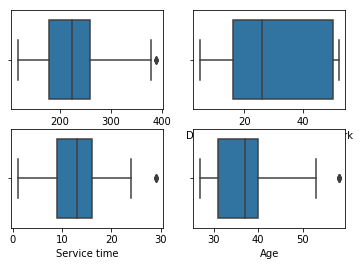

In [102]:
plt.subplot(221)
sns.boxplot(df['Transportation expense'])
plt.subplot(222)
sns.boxplot(df['Distance from Residence to Work'])
plt.subplot(223)
sns.boxplot(df['Service time'])
plt.subplot(224)
sns.boxplot(df['Age'])

In [103]:
#except 'distance from Residence to Work', rest three has outliers

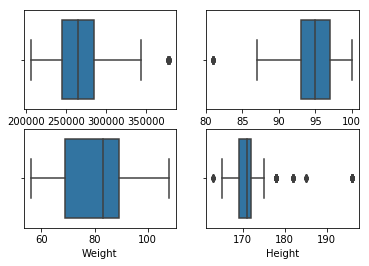

In [104]:
plt.subplot(221)
sns.boxplot(df['Work load Average/day '])
plt.subplot(222)
sns.boxplot(df['Hit target'])
plt.subplot(223)
sns.boxplot(df['Weight'])
plt.subplot(224)
sns.boxplot(df['Height'])


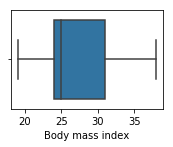

In [105]:
plt.subplot(221)
sns.boxplot(df['Body mass index'])

In [106]:
# except weight all other has outliers

In [107]:
#let us get all the variables having outliers in a single list
outlier= ["Transportation expense","Service time","Age","Work load Average/day ","Hit target","Height"]

In [108]:
for i in outlier:
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)

    #Converting to nan
    data.loc[data.loc[:,i] < minn,i] = np.nan
    data.loc[data.loc[:,i] > maxx,i] = np.nan
    print('{var} - {X} '.format(var = i, X = (data.loc[:,i].isnull().sum())))

C:\Users\vishal\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Transportation expense - 3 
Service time - 4 
Age - 8 
Work load Average/day  - 28 
Hit target - 15 
Height - 107 


In [109]:
df['Transportation expense'].fillna(df['Transportation expense'].mean(),inplace=True)
df['Service time'].fillna(df['Service time'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Work load Average/day '].fillna(df['Work load Average/day '].mean(),inplace=True)
df['Hit target'].fillna(df['Hit target'].mean(),inplace=True)
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 739
Data columns (total 21 columns):
ID                                 718 non-null category
Reason for absence                 718 non-null category
Month of absence                   718 non-null category
Day of the week                    718 non-null category
Seasons                            718 non-null category
Transportation expense             718 non-null float64
Distance from Residence to Work    718 non-null float64
Service time                       718 non-null float64
Age                                718 non-null float64
Work load Average/day              718 non-null float64
Hit target                         718 non-null float64
Disciplinary failure               718 non-null category
Education                          718 non-null category
Son                                718 non-null category
Social drinker                     718 non-null category
Social smoker                      718 non-nul

In [111]:
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cname)

['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [112]:
cat_name=df.columns[(df.dtypes=="category")].tolist()

In [113]:
cat_name

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet']

In [114]:
cat_name.remove("ID")

In [115]:
data_corr=df.loc[:,cname]

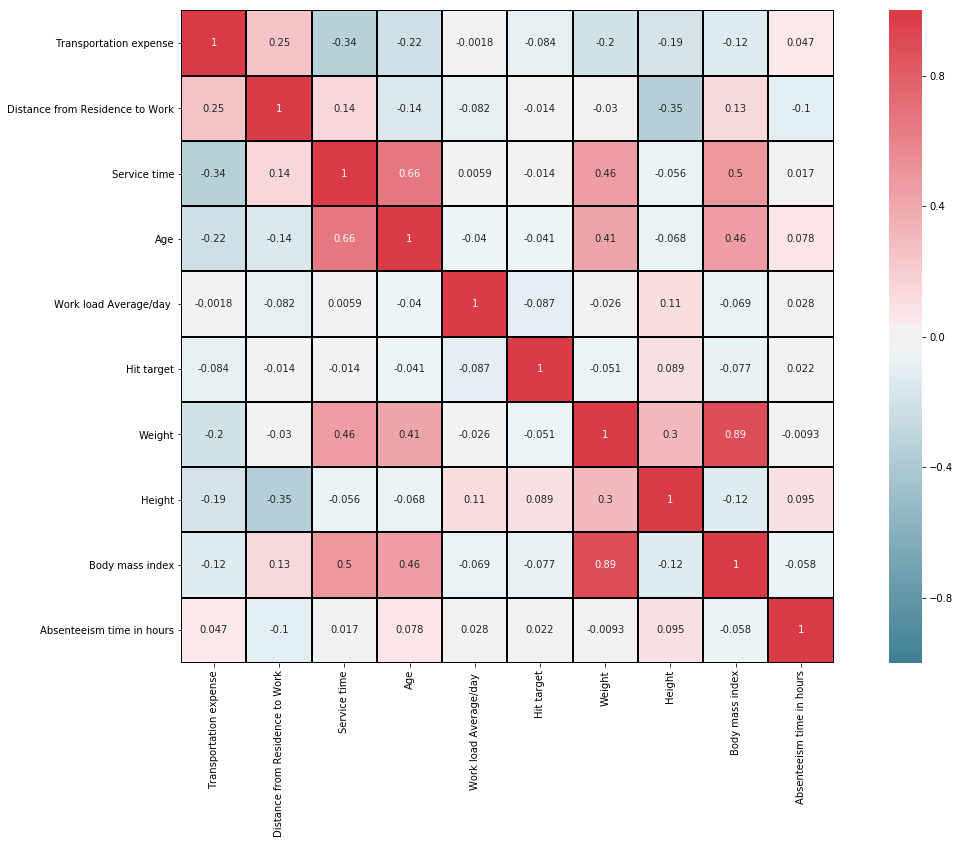

In [116]:
# Correlation matrix

#generating correlation matrix
corr=data_corr.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(20,12)) 

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

In [117]:
#we see that weight is highly correlated tobody mass index so lets remove weight

In [118]:
df=df.drop(['Weight','ID'],axis=1)
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()

In [119]:
#Nomalisation
for i in cname:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Height
Body mass index
Absenteeism time in hours


In [120]:
df.head(10)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,26.0,7.0,3,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,2.0,1.0,0.0,1.0,0.272727,0.578947,0.033333
1,0.0,7.0,3,1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,1.0,1.0,0.0,0.0,0.454545,0.631579,0.000000
2,23.0,7.0,4,1,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,1.0,0.0,1.0,0.0,0.0,0.212121,0.631579,0.016667
3,7.0,7.0,5,1,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,1.0,2.0,1.0,1.0,0.0,0.151515,0.263158,0.033333
4,23.0,7.0,5,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,1.0,2.0,1.0,0.0,1.0,0.272727,0.578947,0.016667
6,22.0,7.0,6,1,0.381613,1.000000,0.071429,0.032258,0.194471,0.842105,0.0,1.0,1.0,1.0,0.0,4.0,0.272727,0.421053,0.066667
7,23.0,7.0,6,1,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0.0,1.0,4.0,1.0,0.0,0.0,0.151515,0.210526,0.033333
8,19.0,7.0,2,1,0.137037,0.148936,0.464286,0.225806,0.194471,0.842105,0.0,1.0,2.0,1.0,0.0,0.0,1.000000,0.315789,0.333333
9,22.0,7.0,2,1,0.433333,0.127660,0.464286,0.322581,0.194471,0.842105,0.0,3.0,1.0,0.0,0.0,1.0,0.272727,0.526316,0.066667
10,1.0,7.0,2,1,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0.0,1.0,4.0,1.0,0.0,0.0,0.151515,0.210526,0.066667


In [121]:
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)

In [122]:
train.shape

(574, 19)

In [123]:
test.shape

(144, 19)

In [124]:
#building decision tree
regr_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:18], train.iloc[:,18])

In [125]:
# predicting
pred_DT=regr_DT.predict(test.iloc[:,0:18])

In [126]:
rmse = sqrt(mean_squared_error(test.iloc[:,18], pred_DT))

In [127]:
rmse

0.07555280194968648

In [128]:
# building model
regr_RF = RandomForestRegressor(n_estimators=1000,random_state=2).fit(train.iloc[:,0:18], train.iloc[:,18])

In [129]:
pred_RF=regr_RF.predict(test.iloc[:,0:18])

In [130]:
rmse = sqrt(mean_squared_error(test.iloc[:,18], pred_RF))
print(rmse)

0.10004058927777688
